In [6]:
import pandas as pd
csv_data = pd.read_table('callReason.txt', header=None)
csv_data.columns=['class', 'text']
csv_data['class'].drop_duplicates()

0       投诉（含抱怨） 
1            办理 
4       咨询（含查询） 
239          其他 
3766      表扬及建议 
6329        非来电 
Name: class, dtype: object

In [7]:
da = csv_data.groupby('class').count()

In [8]:
da

,text
class,
其他,80
办理,4931
咨询（含查询）,4101
投诉（含抱怨）,6072
表扬及建议,1
非来电,2


In [7]:
da['class'] = ['others', 'transform', 'research', 'complain',  'prains', 'non-call']

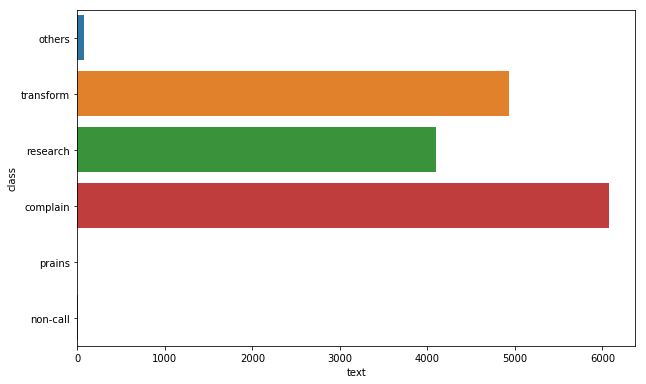

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
fig, ax = plt.subplots( 1,1, figsize=(10, 6.18))
sns.barplot(x = 'text', y = 'class', data=da,  label = 'class distribute')

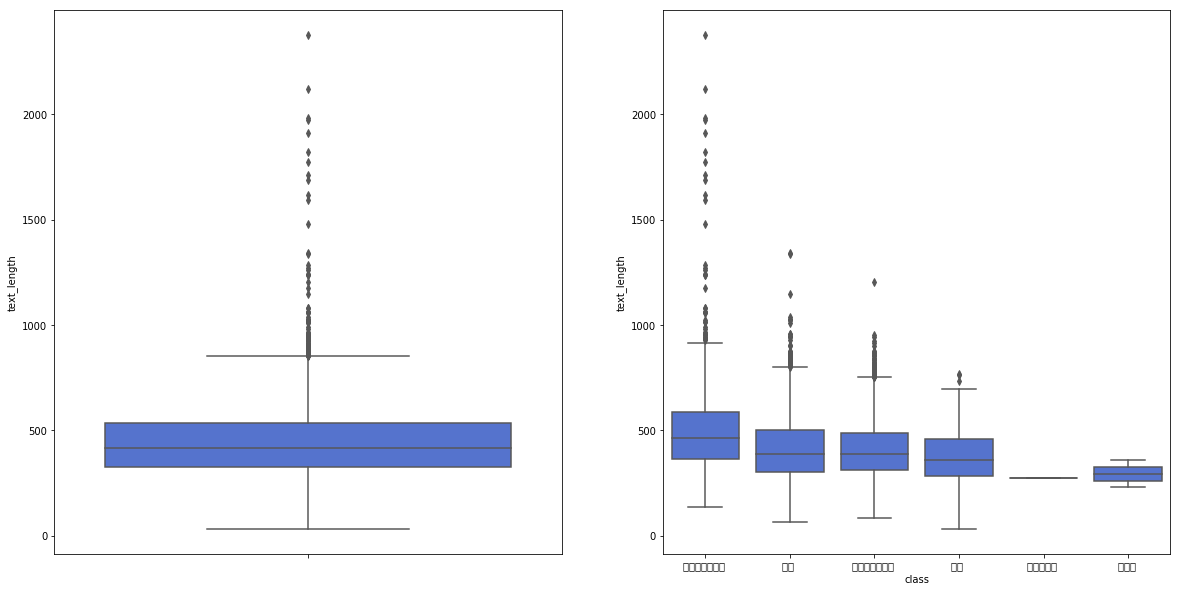

In [15]:
def get_counter(text):
    return len(text)
csv_data['text_length'] = csv_data['text'].apply(get_counter)
fig, ax = plt.subplots( 1,2, figsize=(20, 10))
sns.boxplot( ax = ax[0], y = 'text_length', color='royalblue',data=csv_data)
sns.boxplot( ax = ax[1], x = 'class', y = 'text_length', color='royalblue',data=csv_data)

In [9]:
import jieba
def get_token(text):
    token = jieba.cut(text)
    return ' '.join(token)
csv_data['token'] = csv_data['text'].apply(get_token)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Dumping model to file cache /tmp/jieba.cache
Dump cache file failed.
Traceback (most recent call last):
  File "/home/shiqundong/miniconda3/lib/python3.6/site-packages/jieba/__init__.py", line 152, in initialize
    _replace_file(fpath, cache_file)
PermissionError: [Errno 1] Operation not permitted: '/tmp/tmpi3_fuk_g' -> '/tmp/jieba.cache'
Loading model cost 1.030 seconds.
Prefix dict has been built succesfully.


In [13]:
csv_data.loc[1]['text']

'你好很高兴为您服务.你好，给我给我这个转成那个，一百三十八那个套餐.好的，现在转现在就生效了.那您这边.电话，按一号键确认，我帮您办理.一百三十八元的话，那您需要那个.五百分钟通话一g流量这个吗.嗯，还有啥还有啥.嗯五百三，呃一百三十八元就这一种.啊，你说按啥确认呐.按一号键听好提示音.好的请您稍等.好的，这边帮您转成功了，先生，立即生效.嗯，一百三十八套餐是啊.对是的.好好.嗯，好还有其他可以帮到您呢.没有了再见.嗯，好，祝您新年愉快 ，再见.再见'

In [14]:
list(da.index.values)

['其他 ', '办理 ', '咨询（含查询） ', '投诉（含抱怨） ', '表扬及建议 ', '非来电 ']

In [16]:
label_dict = dict(zip(list(da.index.values[:4]), range(4)))
def get_label(cls):
    if cls in label_dict.keys():
        return label_dict[cls]
    return 0
csv_data['label'] = csv_data['class'].apply(get_label)

In [17]:
csv_data['label'].drop_duplicates()

0      3
1      1
4      2
239    0
Name: label, dtype: int64

In [18]:
csv_data.to_csv('call_reason.csv', index=False)

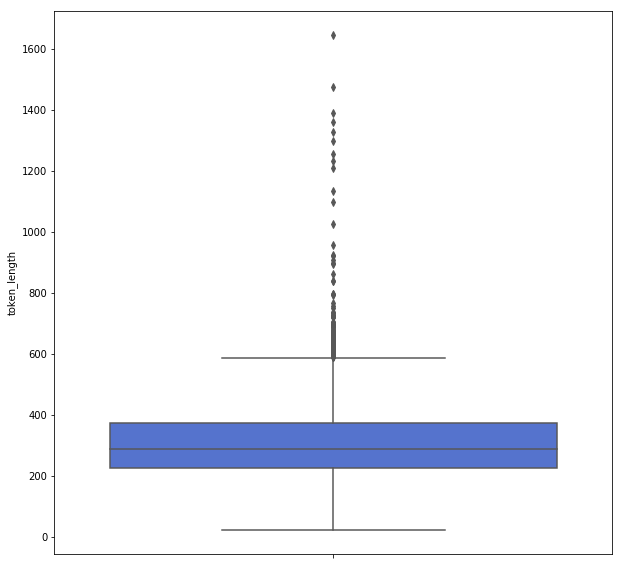

In [19]:
import pandas as pd
csv_data = pd.read_csv('call_reason.csv', usecols=['token'])
def get_counter(text):
    text = text.split()
    return len(text)
csv_data['token_length'] = csv_data['token'].apply(get_counter)
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
fig, ax = plt.subplots( 1,1, figsize=(10, 10))
sns.boxplot( y = 'token_length', color='royalblue',data=csv_data)

In [8]:
csv_data.loc[0]['token']

'你好 高兴 您 服务 . 喂 你好 . 嗯 ， 我家 的 宽带 ， 昨天晚上 ， 就 掉线 了 . 这 这边 是 我 这边 什么 都 收不到 ， 电视 也 看不到 ， 无线网 也 不能 用 . 请问 您 的 宽带 账号 是 本 手机 吗 . 嗯 ， 对 ， 是 这个 本 . 就 这个 本 手机 吗 . 后 有没有 提示 错误代码 . 这个 好像 他 说 什么 ， . 我 网络 ， 网络 不能 用 ， 什么 的 . 嗯 ， 那 请问 一下 ， 家 里面 使用 的 有没有 光猫 还有 路由器 . 那 都 有 啊 . 您 看 一下 光猫 上 的 指示灯 有没有 亮红灯 . 他 那个 光猫 上 好像 ， 好像 他 他 启动 了 以后 ， 我 看 就 没有 没有 红灯 ， 全是 全是 绿灯 啊 . 是 三 盏灯 吗 . 他 就是 全是 绿 的 ， 我 没有 看到 他亮 的 ， 亮 的 有 红灯 啊 . 您 看 一下 是不是 亮 了 三 盏灯 . 啊 ， 我 我 我 看 一下 啊 . 好 的 . 他 他 就是 就是 那个 ， 那个 上面 你 说 红灯 ， 我 没 我 没 看到 有 ， 红灯 啊 . 您 看 . 几盏 灯好 吗 . 嗯 ， 我 给 你 看 一下 啊 . 嗯 ， 是 . 一盏 两盏 三盏 . 盏灯 吗 . 四 盏灯 . 是 不灯 长亮 的 . 嗯 ， 长亮 的 . 家 里面 使用 的 有没有 路由器 . 有 . 您 看 一下 路由器 上 有 一个 sys 的 指示灯 ， 有没有 闪烁 . 他 这个 好像 好像 是 亮 着 了 ， 没闪 . 这个 指示灯 代表 路由器 的 工作 状态 ， 正常 情况 下 ， 应该 闪烁 的 . 如果 现在 长亮 的话 ， 可能 是 路由器 有 问题 . 请问 您 刚才 有没有 把 路由器 还有 光猫 重启 试过 . 这个 这个 没有 . 那 您 稍候 先 把 光猫 还有 路由器 关 了 ， 过五到 十分钟 重新 再启动 . 看看 能 不能 正常 的 使用 . 如果 那个 指示灯 还是 不 闪烁 的话 ， 那 建议您 换 一个 路由器 . 可能 是 路由器 坏 了 . 嗯 . 嗯 ， 好 的 ， 好 的 ， 好 的 谢谢 啊 . 不 客气 ， 还有 什么 需要 补充 的 吗 . 嗯 . 接   ， 就是 这个 ， 电视 ， 他 ， 他

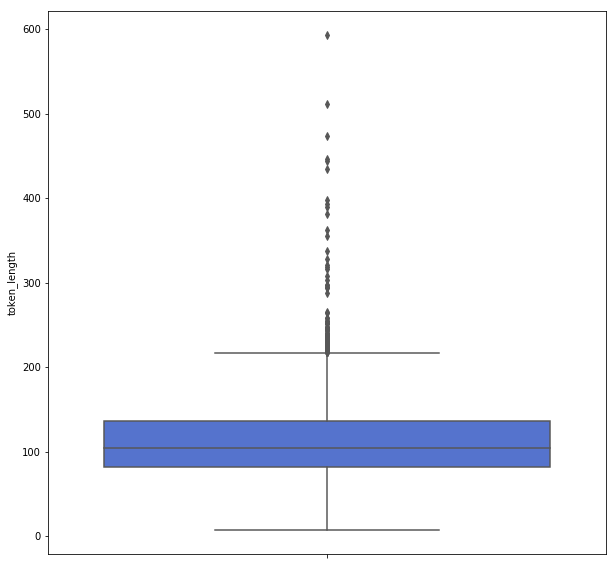

In [22]:
import pickle as p
token_voc = p.load(open('token.voc', 'rb'))
import pandas as pd
csv_data = pd.read_csv('call_reason.csv', usecols=['token'])
def get_counter(text):
    text = text.split()
    i = 0
    for item in text:
        if item in token_voc.keys():
            i+=1
    return i
csv_data['token_length'] = csv_data['token'].apply(get_counter)
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
fig, ax = plt.subplots( 1,1, figsize=(10, 10))
fig.title = 'remove stop word'
sns.boxplot( y = 'token_length', color='royalblue',data=csv_data)